In [3]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'"
c:\Users\yeyer\OneDrive\Desktop\Aprendizaje maquianal practicas\AM_PerceptronSimple


C:\Users\yeyer\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:

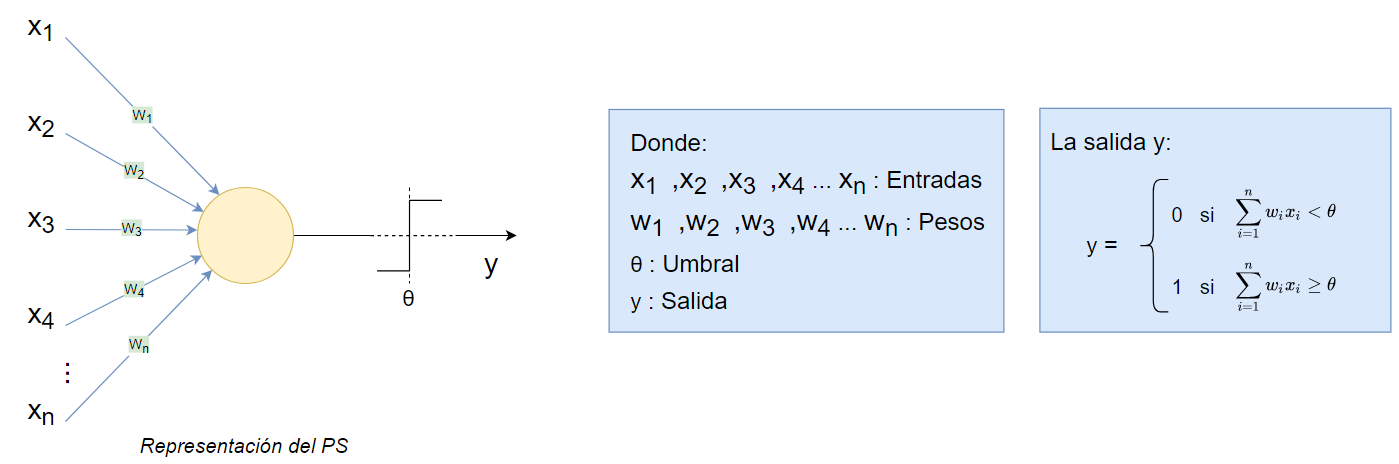

In [4]:
display(Image(filename='./2_imagenes/perceptron.png', width=1000))

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

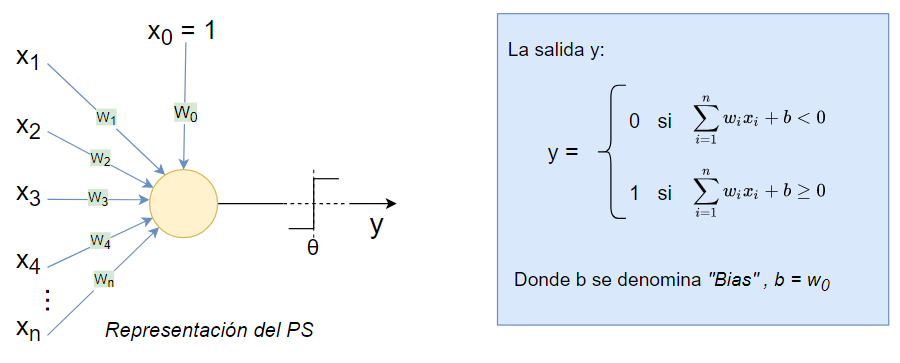

In [5]:
display(Image(filename='./2_imagenes/perceptron_bias.png', width=1000))

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple. Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

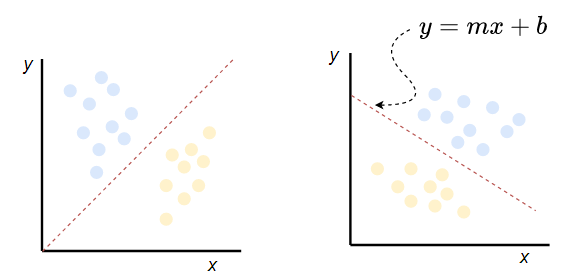

In [6]:
display(Image(filename='./2_imagenes/lineal_separable.png', width=700))

A continuación, vamos a implementar la _clase Perceptron_ y el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida o predicción $$y_{pred} = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término correspondiente al bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y_{pred} = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida real $y_{real}$ $$e = y_{pred} - y_{real}$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso hasta terminar el número de iteraciones

In [7]:
# Librerías a importar
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
class Perceptron():
    """Perceptrón simple.

    Parámetros
    ------------
    eta : float
        factor de entrenamiento (entre 0.0 y 1.0)
    epocas : int
        iteraciones para el entrenamiento.
    random_state : int
        Semilla generadora de números aleatorios para la inicialización de los pesos.

    Atributos
    -----------
    w_ : 1d-array
        Pesos despues del entrenamiento.
    mal_clasificados_ : list
        Número de desaciertos en cada época
    """
    def __init__(self, eta=0.001, epocas=5, random_state=None):
        self.eta = eta
        self.epocas = epocas
        self.random_state = random_state

    def fit(self, X, y):
        """Función de entrenamiento.
        Parameters
        ----------
        X : array, shape = [n_muestras, n_caracteristicas]
          vector de entrenamiento
        y : array, shape = [n_muestras]
          vector target.

        Returns
        -------
        self : objeto

        """

        rgen = RandomState(self.random_state)
        #inicializo los pesos con valores aleatorios entre 0 y 1 rgen.normal
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.mal_clasificados_ = []
        self.errores_ = []

        # Para cada época de entrenamiento
        for _ in range(self.epocas):
            errores = 0
            # Iterar sobre todas las muestras
            for xi, target in zip(X, y):
                # Cálculo del error y actualización del vector de pesos
                #print(xi)
                error = int(target) - self.predict(xi)
                self.w_[1:] += self.eta * error * xi  # actualizar los pesos
                self.w_[0] += self.eta * error  # actualizar el bias
                errores += int(error != 0.0)  # contar errores
                self.errores_.append(error)
            self.mal_clasificados_.append(errores)  # guardar el número de errores


        return self

    def calcular_entrada(self, x):
        """cálculo de la entrada al perceptrón"""

        
        # Producto escalar entre los pesos y las características de entrada
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """devuelve la etiqueta de la clase pertenciente después de aplicar la fn. de activación"""
        # la función de activación es la función signo:
        # 0 si el resultado de calcular_entrada < 0
        # 1 si el resultado de calcular_entrada >= 0

        # Función de activación es la función signo
        return np.where(self.calcular_entrada(X) >= 0, 1, 0)


## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se tienen 4 características: el largo y ancho del sépalo y pétalo, en centímetros.

In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df_filtrado = df[df.iloc[:, -1].isin(['Iris-setosa', 'Iris-versicolor'])]

Predictoras = df_filtrado.iloc[:, [0, 2]]
Etiquetas = df_filtrado.iloc[:, -1]
df_filtrado.tail()


,0,1,2,3,4
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [10]:
# CODIFICACION DE LA VARIABLE ETIQUETAS

from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Codificar las etiquetas
Etiquetas = label_encoder.fit_transform(Etiquetas)
# Transformar 0 a -1 y mantener 1 como está
#Etiquetas = np.where(Etiquetas == 0, -1, 1)

In [11]:
Etiquetas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Graficamos el Dataset

Separe los datos en predictores (`X`) y etiquetas (`y`). Considere sólo las clases `setosa`y `versicolor` y los atributos de la primer y tercera columnas como características de entrada, Largo de sépalo (primer columna) y largo de pétalo (tercer columna). Grafique los datos.

In [12]:
import numpy as np
#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)
from sklearn.model_selection import train_test_split

# division de los datos en test y prueba mas las etiquetas
Predictoras_train, Predictoras_test, Etiquetas_train, Etiquetas_test = train_test_split(Predictoras, Etiquetas, test_size=0.1, shuffle=True, random_state=42,  stratify = Etiquetas)
# Eliminar el índice y convertir a numpy array para `Predictoras_train`
Predictoras_train = Predictoras_train.reset_index(drop=True).to_numpy()

# Eliminar el índice y convertir a numpy array para `Predictoras_test`
Predictoras_test= Predictoras_test.reset_index(drop=True).to_numpy()


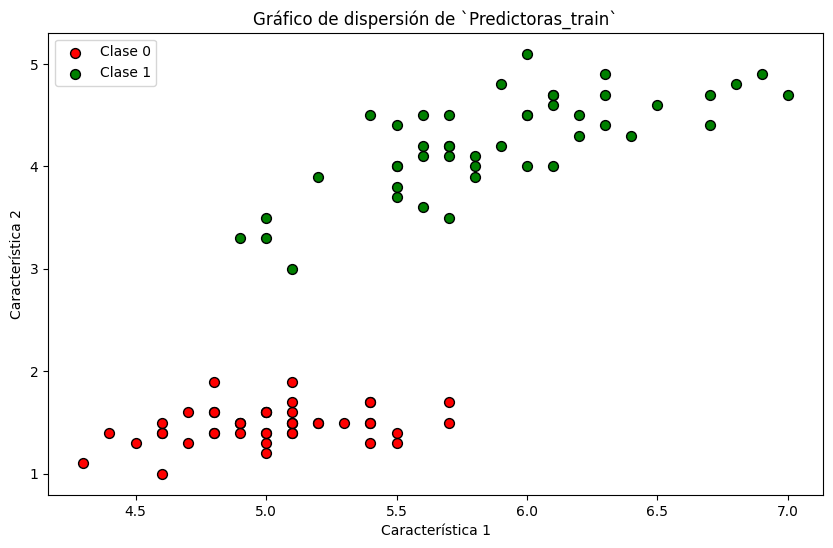

In [13]:
# Definir los colores y etiquetas para cada clase
clases = np.unique(Etiquetas_train)
colores = ['r', 'g', 'b']  # Asegúrate de que haya suficientes colores para tus clases
etiquetas_clases = {0: 'Clase 0', 1: 'Clase 1'}  # Actualiza con las etiquetas reales

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

for clase, color in zip(clases, colores):
    indices = Etiquetas_train == clase
    plt.scatter(Predictoras_train[indices, 0], Predictoras_train[indices, 1], 
                color=color, label=etiquetas_clases.get(clase, f'Clase {clase}'), edgecolor='k', s=50)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de dispersión de `Predictoras_train`')
plt.legend()
plt.show()

# Entrenamiento del Perceptrón

Utilice la clase implementada para entrenar el perceptrón, pruebe con diferentes valores de coeficiente de entrenamiento y número de épocas.

Haga un gráfico de los mal clasificados por época en función de las épocas y una gráfica de los errores de entrenamiento en cada iteración.

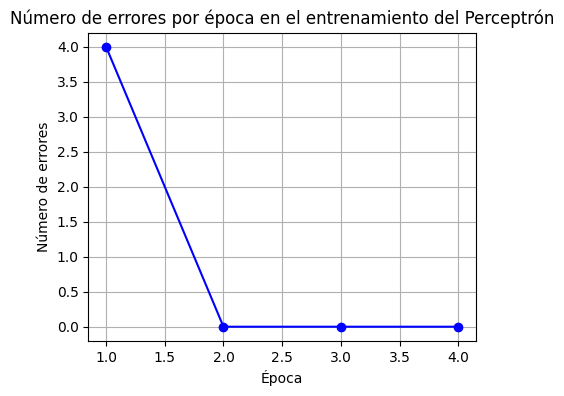

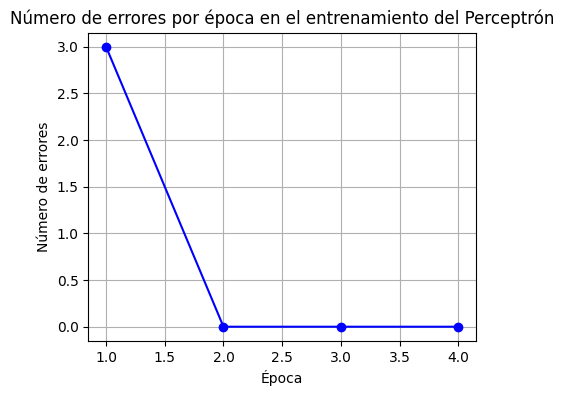

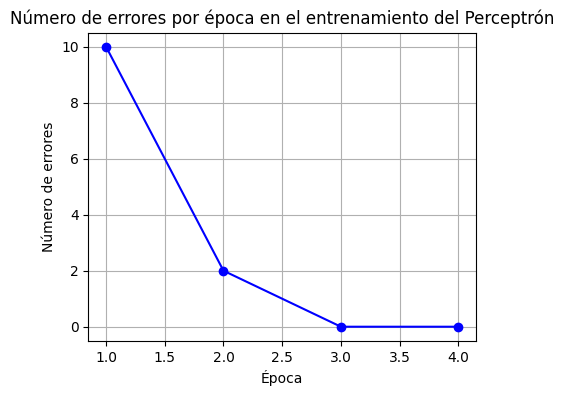

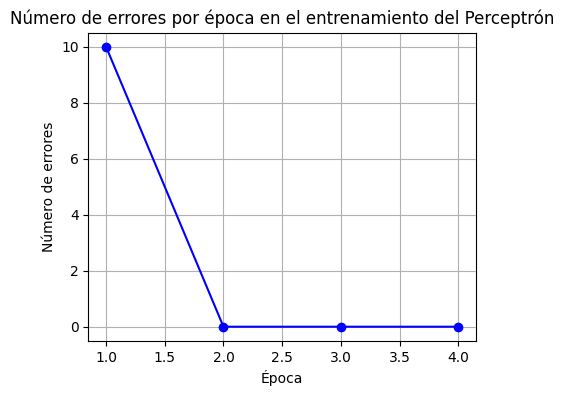

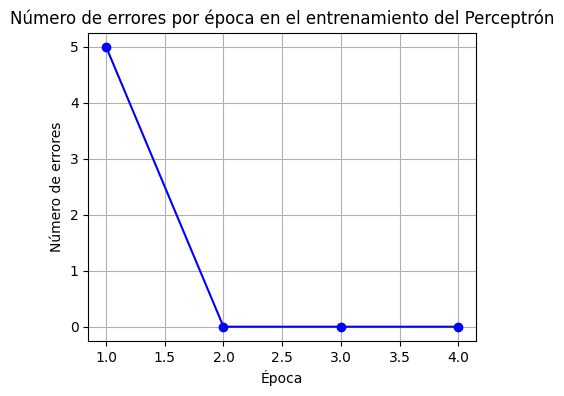

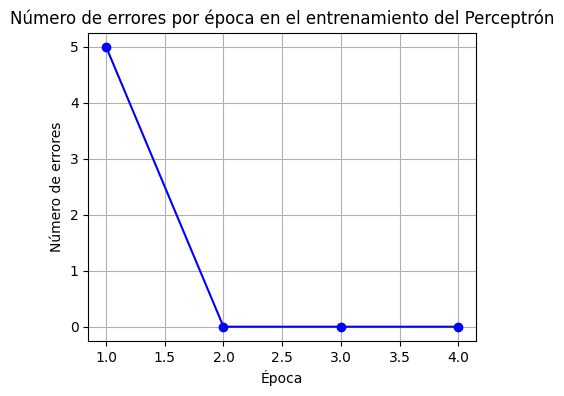

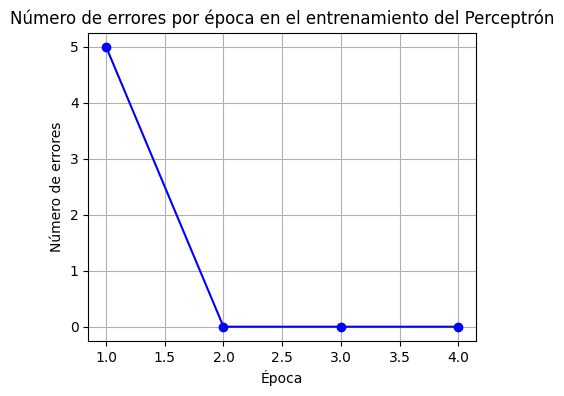

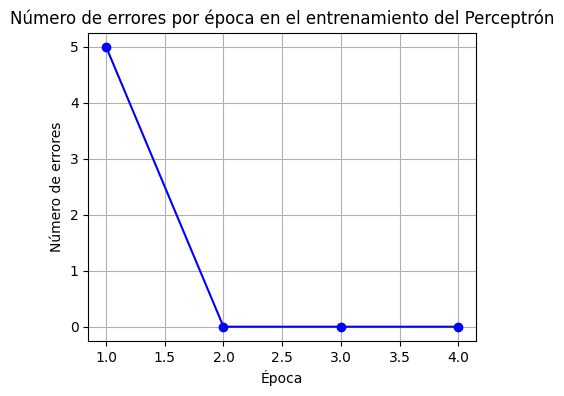

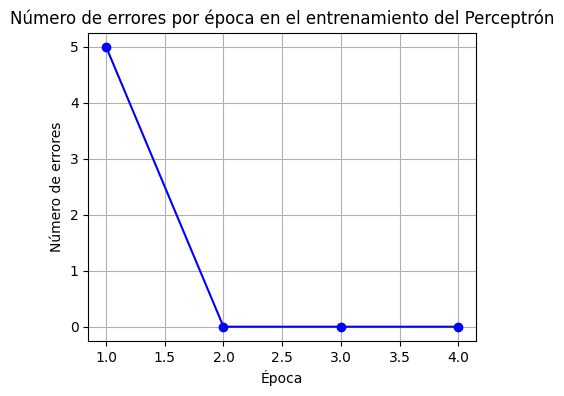

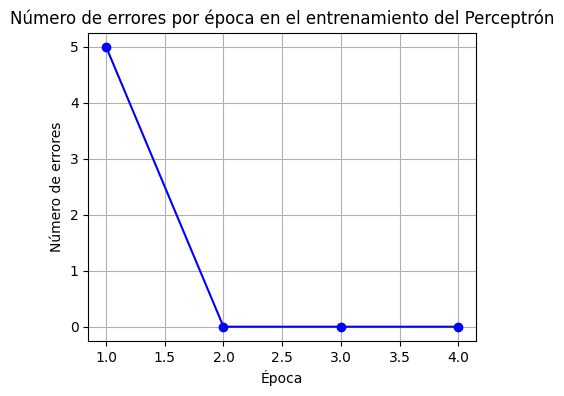

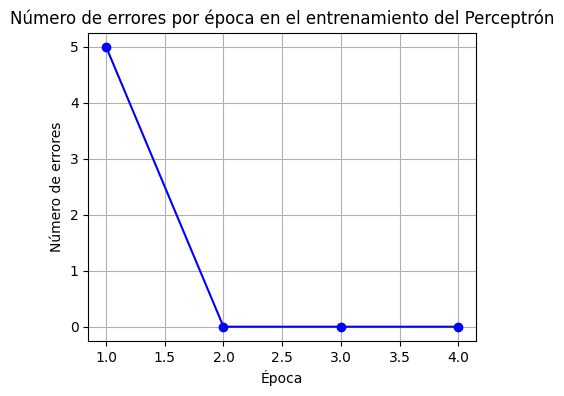

In [14]:
etas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0,0.1]
for eta in etas:

    #Instancio un objeto de la clase Perceptron
    mi_perceptron = Perceptron(eta=eta,epocas=4,random_state=42)

    #llamo al método fit
    mi_perceptron.fit(Predictoras_train,Etiquetas_train)

    # llamo al predict
    j= mi_perceptron.predict(Predictoras_test)

    #Grafico el número de errores o mal clasificados en cada iteración
    # Graficar el número de errores por época
    plt.figure(figsize=(5, 4))
    plt.plot(range(1, len(mi_perceptron.mal_clasificados_) + 1), mi_perceptron.mal_clasificados_, marker='o', linestyle='-', color='b')
    plt.xlabel('Época')
    plt.ylabel('Número de errores')
    plt.title('Número de errores por época en el entrenamiento del Perceptrón')
    plt.grid()
    plt.show()

#Grafico el número de errores por época




In [15]:
mi_perceptron = Perceptron(eta=0.1,epocas=4,random_state=42)

#llamo al método fit
mi_perceptron.fit(Predictoras_train,Etiquetas_train)

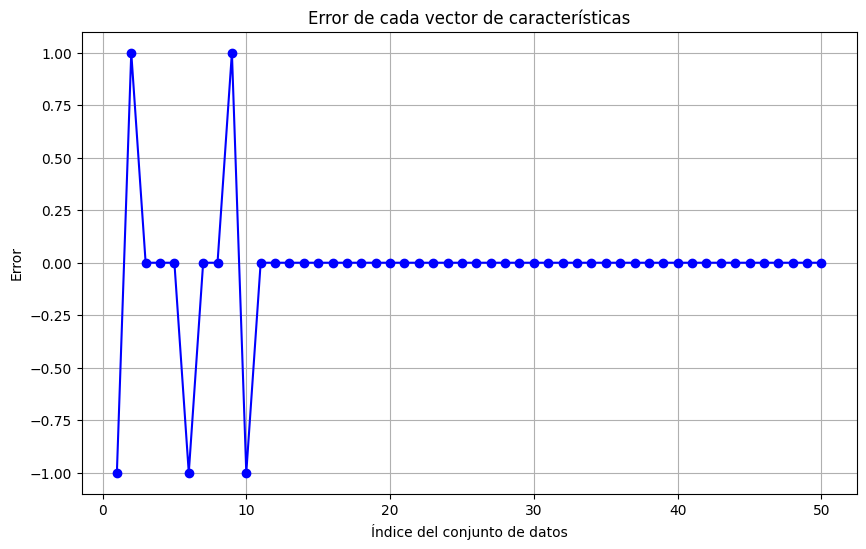

In [16]:
indices = list(range(1, 50 + 1))

# Graficar los errores en función del índice de cada vector
plt.figure(figsize=(10, 6))
plt.plot(indices, mi_perceptron.errores_[:50], marker='o', linestyle='-', color='b')
plt.xlabel('Índice del conjunto de datos')
plt.ylabel('Error')
plt.title('Error de cada vector de características')
plt.grid()
plt.show()

Recordemos la ecuación: $$y_{pred} = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y_{pred} = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### Ahora vamos a calcular la recta

In [17]:
#------------------ Representación de la recta ------------------------------------
# vector de pesos del perceptrón entrenado
Vector = mi_perceptron.w_
print("Vector de pesos",Vector)
# cálculo de la pendiente
m = -(Vector[1]/Vector[2])
# cálculo de la ordenada al origen
b = -(Vector[0]/Vector[2])

print("Pendiente de la recta",m)
print("Ordenada al origen",b)
# armo la recta y la grafico junto a los datos



Vector de pesos [-0.09503286 -0.16138264  0.43647689]
Pendiente de la recta 0.36973926550735575
Ordenada al origen 0.2177271274902269


**Graficamos la recta resultante**

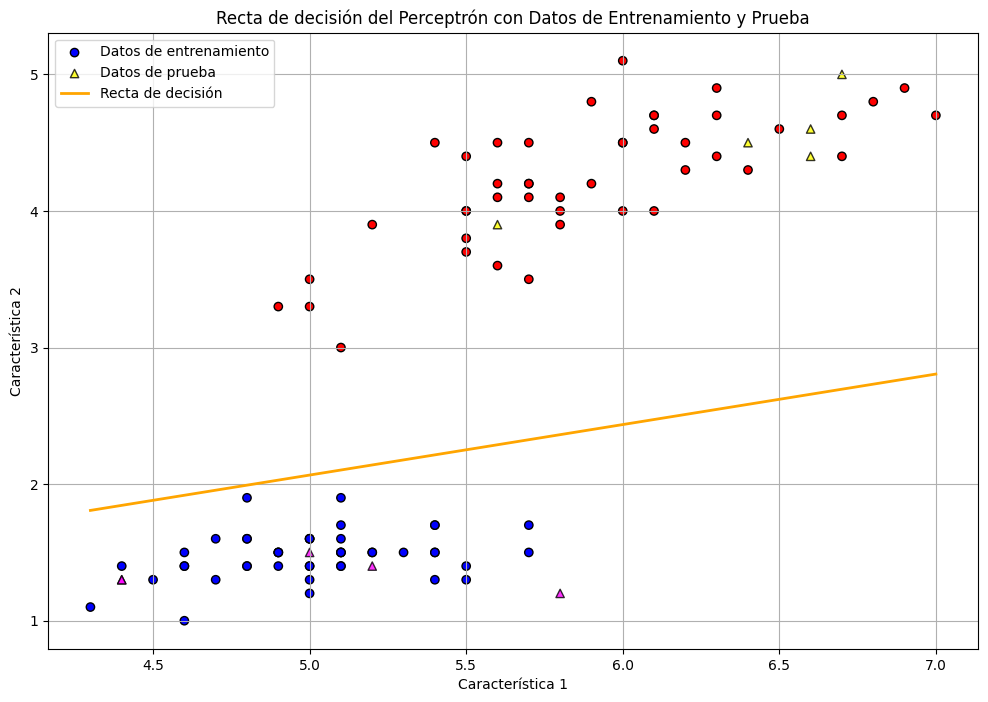

In [18]:
# Crear un rango de valores de x para graficar la recta
x_vals = np.linspace(Predictoras_train[:, 0].min(), Predictoras_train[:, 0].max(), 100)
# Calcular los valores correspondientes de y
y_vals = m * x_vals + b



# Graficar los datos originales de entrenamiento
plt.figure(figsize=(12, 8))
# Graficar datos de entrenamiento
plt.scatter(Predictoras_train[:, 0], Predictoras_train[:, 1], c=Etiquetas_train, cmap='bwr', marker='o', edgecolor='k', label='Datos de entrenamiento')
# Graficar datos de prueba
plt.scatter(Predictoras_test[:, 0], Predictoras_test[:, 1], c=j -1, cmap='spring', marker='^', edgecolor='k', label='Datos de prueba', alpha=0.8)
# Graficar la recta de decisión
plt.plot(x_vals, y_vals, color='orange', linestyle='-', linewidth=2, label='Recta de decisión')
# Configurar los ejes y el título
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Recta de decisión del Perceptrón con Datos de Entrenamiento y Prueba')
plt.legend()
plt.grid(True)

**PERCEPTRON CON DOS CLASES CON SKLEARN - COMPARAR CON EL DE NOSOTROS**

Pendiente (scikit-learn): 0.3736263736263735
Ordenada al origen (scikit-learn): 0.21978021978021975


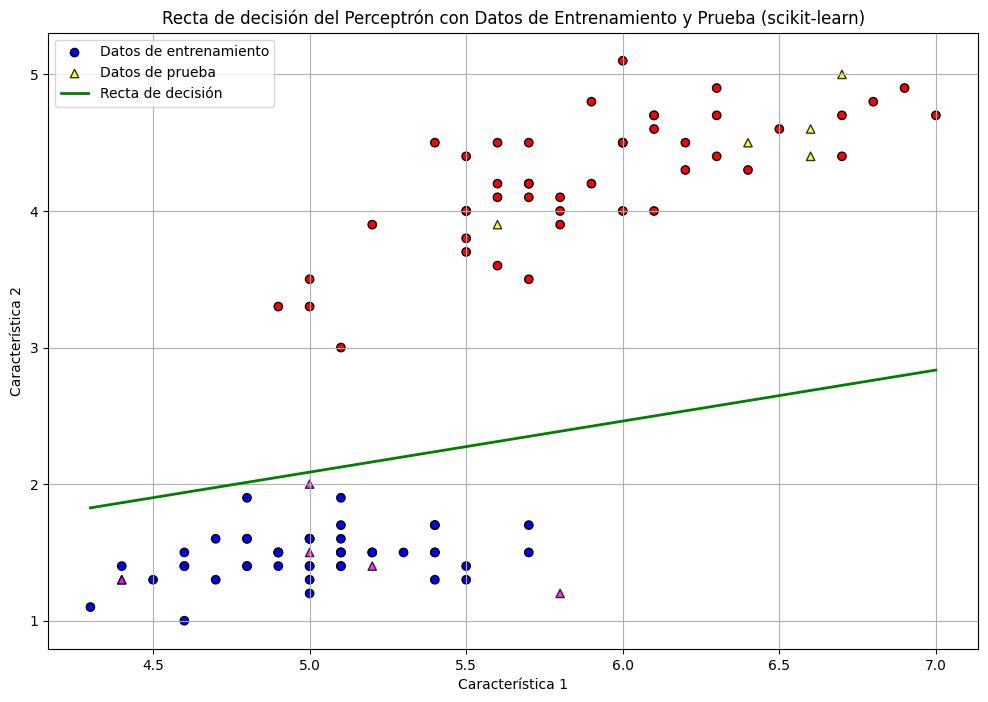

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Instanciar el Perceptrón de scikit-learn
mi_perceptron_sk = Perceptron(eta0=0.01, max_iter=15, random_state=0)

# Entrenar el Perceptrón
mi_perceptron_sk.fit(Predictoras_train, Etiquetas_train)

# Obtener el vector de pesos y la intersección del modelo de scikit-learn
Vector_sk = mi_perceptron_sk.coef_[0]
intercept_sk = mi_perceptron_sk.intercept_[0]

# Cálculo de la pendiente y la ordenada al origen
m_sk = -(Vector_sk[0] / Vector_sk[1])
b_sk = -(intercept_sk / Vector_sk[1])

print("Pendiente (scikit-learn):", m_sk)
print("Ordenada al origen (scikit-learn):", b_sk)

# Crear un rango de valores de x para graficar la recta
x_vals = np.linspace(Predictoras_train[:, 0].min(), Predictoras_train[:, 0].max(), 100)
# Calcular los valores correspondientes de y
y_vals = m_sk * x_vals + b_sk

# Crear el nuevo dato como un array numpy
nuevo_dato = np.array([[5.0, 2.0]])

# Concatenar el nuevo dato al array Predictoras_test
Predictoras_test_actualizado = np.vstack([Predictoras_test, nuevo_dato])

# Obtener las predicciones para los datos de prueba
predicciones_test = mi_perceptron_sk.predict(Predictoras_test_actualizado)

# Graficar los datos originales de entrenamiento
plt.figure(figsize=(12, 8))

# Graficar datos de entrenamiento
plt.scatter(Predictoras_train[:, 0], Predictoras_train[:, 1], c=Etiquetas_train, cmap='bwr', marker='o', edgecolor='k', label='Datos de entrenamiento')

# Graficar datos de prueba
plt.scatter(Predictoras_test_actualizado[:, 0], Predictoras_test_actualizado[:, 1], c=predicciones_test, cmap='spring', marker='^', edgecolor='k', label='Datos de prueba', alpha=0.8)

# Graficar la recta de decisión
plt.plot(x_vals, y_vals, color='green', linestyle='-', linewidth=2, label='Recta de decisión')

# Configurar los ejes y el título
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Recta de decisión del Perceptrón con Datos de Entrenamiento y Prueba (scikit-learn)')
plt.legend()
plt.grid(True)
plt.show()


## Perceptrón Usando scikit-learn

Ahora utilice las 3 clases del conjunto de datos usando las mismas características (atributos de la primer y tercera columnas). separe los datos en entrenamiento y prueba (20% datos de prueba), `random_state=100`

In [20]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


Predictoras2 = df.iloc[:, [0,2]]
Etiquetas2 = df.iloc[:, -1]
Etiquetas2.tail()


145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, dtype: object

**Codificamos la variable etiquetas a 0 y 1**

In [21]:
# CODIFICACION DE LA VARIABLE ETIQUETAS

from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Codificar las etiquetas
Etiquetas2 = label_encoder.fit_transform(Etiquetas2)
# Transformar 0 a -1 y mantener 1 como está
#Etiquetas = np.where(Etiquetas == 0, -1, 1)

**Dividimos los datos a razon de 80 y 20**

In [22]:
#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)
from sklearn.model_selection import train_test_split

# division de los datos en test y prueba mas las etiquetas
Predictoras_train2, Predictoras_test2, Etiquetas_train2, Etiquetas_test2 = train_test_split(Predictoras2, Etiquetas2, test_size=0.2, shuffle=True, random_state=42,  stratify = Etiquetas2)
# Eliminar el índice y convertir a numpy array para `Predictoras_train`
Predictoras_train2 = Predictoras_train2.reset_index(drop=True).to_numpy()

# Eliminar el índice y convertir a numpy array para `Predictoras_test`
Predictoras_test2= Predictoras_test2.reset_index(drop=True).to_numpy()


**Busqueda del mejor ETA y random state**
eta = 0.001, semilla = 75

In [23]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import random

# Definir los hiperparámetros
eta = 0.0001  # Tasa de aprendizaje
max_iteraciones = 1000  # Máximo número de iteraciones (épocas)
etas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0,1.3]
# Generar una semilla al azar
semilla = random.randint(0, 200)

for eta in etas:
    # Inicializar el modelo Perceptrón con los hiperparámetros deseados
    modelo_perceptron = Perceptron(eta0=eta,max_iter=max_iteraciones,  random_state=semilla)

    # Entrenar el modelo con los datos de entrenamiento
    modelo_perceptron.fit(Predictoras_train2, Etiquetas_train2)

    # Obtener el número de iteraciones en las que el modelo converge
    epocas_convergencia = modelo_perceptron.n_iter_

    # Predecir las etiquetas en el conjunto de prueba
    predicciones = modelo_perceptron.predict(Predictoras_test2)

    # Evaluar el rendimiento del modelo
    precision = accuracy_score(Etiquetas_test2, predicciones)

    print(f"Tasa de aprendizaje (eta0): {eta}")
    print(f"Épocas hasta la convergencia: {epocas_convergencia}")
    print(f"Precisión del modelo: {precision}")
    print(f"Semilla utilizada: {semilla}")
    if precision == 1.0:
        break


Tasa de aprendizaje (eta0): 0.0001
Épocas hasta la convergencia: 6
Precisión del modelo: 0.6333333333333333
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.001
Épocas hasta la convergencia: 9
Precisión del modelo: 0.6666666666666666
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.005
Épocas hasta la convergencia: 9
Precisión del modelo: 0.6666666666666666
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.01
Épocas hasta la convergencia: 9
Precisión del modelo: 0.6666666666666666
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.05
Épocas hasta la convergencia: 9
Precisión del modelo: 0.6666666666666666
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.1
Épocas hasta la convergencia: 9
Precisión del modelo: 0.6666666666666666
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.2
Épocas hasta la convergencia: 9
Precisión del modelo: 0.6666666666666666
Semilla utilizada: 16
Tasa de aprendizaje (eta0): 0.3
Épocas hasta la convergencia: 9
Precisión del modelo: 0.66666666666666

Entrene un perceptrón simple usando la clase [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) de scikit-learn.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Supongamos que tus datos ya están en formato numpy arrays
# Predictoras_train2 y Predictoras_test2 son tus características
# y y_train2 y y_test2 son tus etiquetas.

""" # Si aún no has escalado tus datos, puedes hacerlo ahora
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Predictoras_train2)
X_test_scaled = scaler.transform(Predictoras_test2)
 """
# Crear el modelo de perceptrón
perceptron = Perceptron(random_state=75, eta0=0.001)

# Entrenar el modelo
perceptron.fit(Predictoras_train2, Etiquetas_train2)


Perceptron(eta0=0.001, random_state=75)

Utilice la función plot_decision_regions para graficar las regiones de decisión de las 3 clases, grafique los datos de entrenamiento y prueba, diferenciándolos

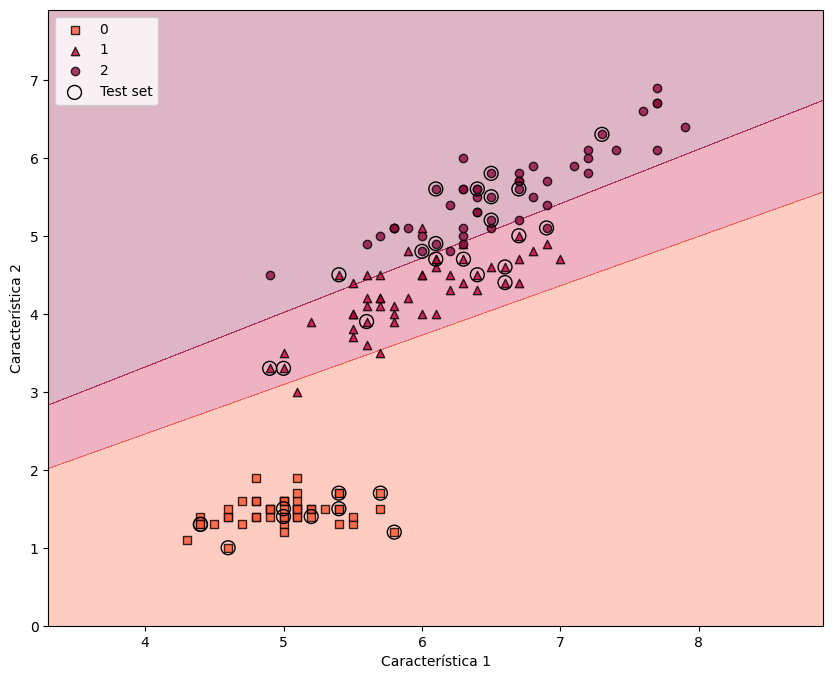

In [25]:
Etiquetas_train2_ = pd.Series(Etiquetas_train2)
Etiquetas_test2_ = pd.Series(Etiquetas_test2)


#Grafico la frontera de decisión, muestro los datos de entrenamiento y prueba
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#La funcion recibe x_Train y X_Test como numpy arrays y las etquietas como pa.series
def plot_decision_regions_custom(X_train, X_test, y_train, y_test, clasificador, resolution=0.002):
    
    # Combinar los datos de entrenamiento y prueba
    X_combined = np.vstack((X_train, X_test))
    y_combined = pd.concat([y_train, y_test], axis=0)
    
    # Crear los índices de las muestras de prueba
    test_idx = range(len(y_train), len(y_combined))

    # Marcadores y mapas de colores
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#DAF7A6']
    cmap = ListedColormap(colors[:len(np.unique(y_combined))])

    # Superficie de decisión
    x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
    x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Dibujar la superficie de decisión
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar todas las muestras según su clase con distintos marcadores y colores
    for idx, cl in enumerate(np.unique(y_combined)):
        plt.scatter(x=X_combined[y_combined == cl, 0], 
                    y=X_combined[y_combined == cl, 1],
                    alpha=0.8, 
                    c=np.array([colors[idx]]), 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # Resaltar las muestras de prueba
    X_test_highlight = X_combined[test_idx, :]
    plt.scatter(X_test_highlight[:, 0],
                X_test_highlight[:, 1],
                c='None',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100, 
                label='Test set')

    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.legend(loc='upper left')
    plt.show()

# Usar la función para graficar las regiones de decisión
plt.figure(figsize=(10, 8))

plot_decision_regions_custom(Predictoras_train2, Predictoras_test2, Etiquetas_train2_, Etiquetas_test2_, clasificador=perceptron)

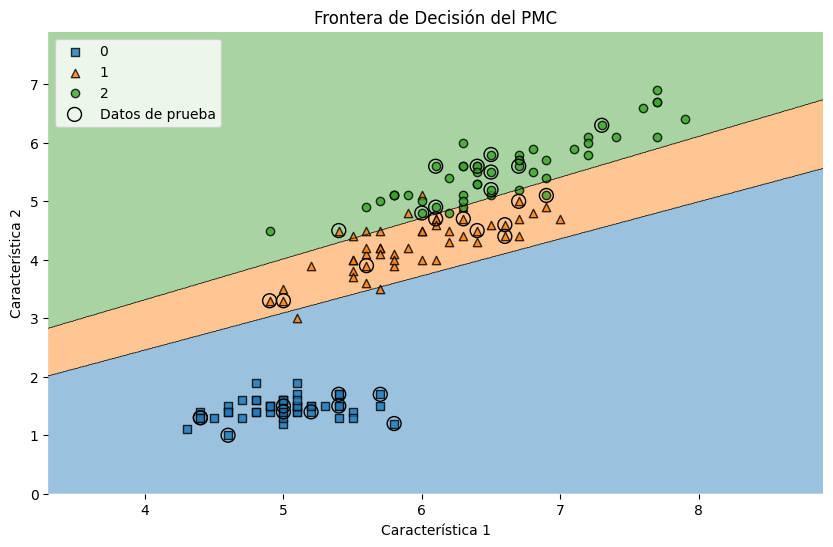

In [26]:
from mlxtend.plotting import plot_decision_regions

# Convertir Predictoras2 a numpy array si no lo está
Predictoras2 = Predictoras2.to_numpy()

plt.figure(figsize=(10, 6))

# Graficar las regiones de decisión
plot_decision_regions(Predictoras2, Etiquetas2, clf=perceptron, legend=2)

# Agregar un círculo alrededor de los datos de prueba
plt.scatter(Predictoras_test2[:, 0], Predictoras_test2[:, 1], facecolors='none', edgecolors='k', s=100, label='Datos de prueba')

plt.title('Frontera de Decisión del PMC')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()


Evalúe el desempeño del clasificador

In [27]:
from sklearn.metrics import accuracy_score
# Hacer predicciones
y_pred = perceptron.predict(Predictoras_test2)

# Evaluar el modelo
accuracy = accuracy_score(Etiquetas_test2, y_pred)
print(f'Accuracy del Perceptrón: {accuracy:.2f}')

Accuracy del Perceptrón: 0.93
